## Alumno : Rubén Álvarez Mosquera

---
# **Clasificación Multiclase de la valoraciones de aplicaciones en Google Store**

*Prefacio : Nuestra tarea consiste en clasificar la puntuación (rating) de las aplicaciones de Google Store*

*Podemos ver el dataset en Kaggle https://www.kaggle.com/datasets/lava18/google-play-store-apps*

---

## Declaración de módulos
---

En primer lugar, vamos a importar algunos módulos comunes. 

También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

También agregaremos una librería (warnings) para evitar los molestos mensajes de advertencia(Futurewarnings).

In [1]:
# Se requiere Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)

# Se requiere Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Otros imports
import numpy as np
import os

# Importamos la librería Pandas para administar Dataframes
import pandas as pd

# la línea que sigue, sólo en Colab ...
# %matplotlib inline
# Importamos librería MatPlotLib
import matplotlib as mpl
import matplotlib.pyplot as plt


# Importamos librería "Seaborn" para la visualización que es como un MatPlotLib con "esteriodes"
import seaborn as sns 


# Importa la librería que va a posibilitar evitar que salgan los molestos mensajes de advertencia
import warnings

Configuración de las Advertencias "Futurewarning"

In [2]:
# configuración para eviatar que aparezcan las advertencias "FutureWarnings"
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Configuración de las visualizaciones de "Seaborn"

In [3]:
# tamaño del texto en las etiquetas por defecto para Matplotlib
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)


# Configuramos visualizaciones con Seaborn
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## Importacion de Datos
---

Definimos la función que importará los datos de un archivo CSV a un Dataframe de Pandas

In [4]:
GOOGLE_PATH = os.path.join("dataset")

def load_google_data(google_path):
    csv_path = os.path.join(google_path, "googleplaystore.csv")
    return pd.read_csv(csv_path)

Llamamos a la función de importación de datos y los importamos a la variable "insurance"

In [5]:
google = load_google_data(GOOGLE_PATH)

Comprobamos el estado de los Datos, mediante una revisión de las primeras filas

In [6]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Realizamos una copia de backup

In [7]:
google_backup = google.copy()

## Revisamos el estado de los datos
---

#### Revisamos las columnas en general

In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Podemos ver que :
- Menos la variable "Rating" que es cuantitativa/continua, todas son variables con valores de objeto/string, aunque alguna claramente es cuantitativa como Reviews, Size, Installs, Price

Deberemos actuar sobre algunas columnas para subsanar formatos, para poder realizar la clasificación lo más eficientemente posible sin pérdida de información

#### Comprobación del número de NaN por categoría

In [9]:
# De forma global
google.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Vemos que hay valores NaN en :
- Rating      1474
- Type           1
- Content Rating 1
- Current Ver    8
- Android Ver    3

Por lo que tendremos que actuar sobre ellas para corregir la ausencia de datos

### "App" ------------------------------------------
*Nombre de la aplicación*

In [10]:
# Eliminación de la columna "App"
google.drop(["App"],axis=1, inplace=True)

Procedertemos a eliminar esta celda, porque no aporta información para la clasificación

### "Category" ------------------------------------------
*Nombre de la categoría en la que está clasificada la Aplicación*

In [11]:
google['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [12]:
google['Category'].nunique()

34

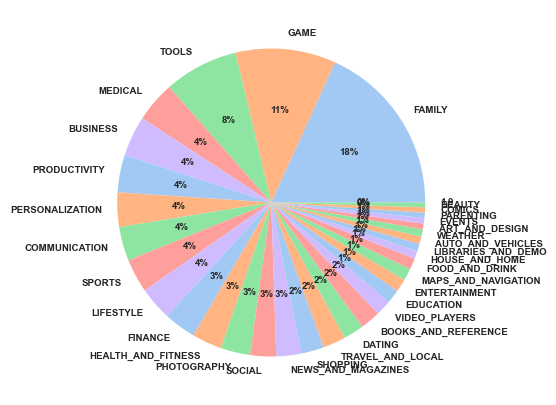

In [13]:
plt.rcParams['font.size'] =7
mpl.rc('axes',  labelsize=7)
mpl.rc('xtick', labelsize=7)
mpl.rc('ytick', labelsize=7)

data = list(google['Category'].value_counts())
labels = google['Category'].value_counts().index.tolist()
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

- Como podemos ver existen 34 opciones de categoría
- Las 3 categorías más numerosas son Family, Game y Tools

- Como son variables categóricas, necesitamos convertirlas, para poder usarlo en el modelo de clasificación.
- Pasaremos a usar "OneHotEncoder"
- Lo haremos en un posterior punto, junto a otras variables que también necesiten el uso de OneHotEncoder

### "Rating" ------------------------------------------
*Puntuación que los usuarios le han dado a la aplicación*

In [14]:
google['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

- Podemos ver que los valores van de 1 a 19
- Este ultimo valor no tiene sentido, ya que los valores van de 1 a 5 estrellas, por lo que nos esperaríamos 5 a lo sumo.
- Tendremos que actuar sobre los datos, y en todo caso copar en 5 el techo máximo

In [15]:
valores_mayor_5 = google.loc[google['Rating'] > 5, 'Rating']
valores_mayor_5.count()

1

In [16]:
valores_mayor_5

10472    19.0
Name: Rating, dtype: float64

- Podemos ver que el número de registros que en la categoría "Rating" mayor de 5 es 1.
- En concreto es el que marca 19, por lo que podemos entender que es un 1.9 en vez de un 19
- Pasamos a cambiar el número 19 por 1.9

In [17]:
google.loc[10472, 'Rating'] = 1.9

In [18]:
google.loc[10472, 'Rating']

1.9

Comprobamos que no hay valores mayores de 5

In [19]:
valores_mayor_5 = google.loc[google['Rating'] > 5, 'Rating']
valores_mayor_5.count()

0

Ahora comprobamos los NaN, y nos damos cuenta que tenemos 1474 NaN.

In [20]:
google['Rating'].isna().sum()

1474

Lo que haremos en aplicar la media aritmética a todo ellos, que es de 4.2

In [21]:
google['Rating'].mean()

4.1915127575531175

In [22]:
google['Rating'] = google['Rating'].fillna(4.2)

In [23]:
google['Rating'].isna().sum()

0

<AxesSubplot:xlabel='Rating', ylabel='Count'>

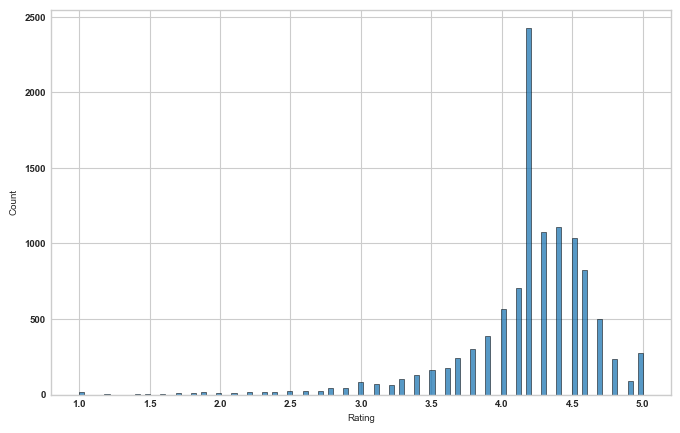

In [24]:
sns.histplot(data=google.Rating)

In [25]:
google['Rating'].mode()

0    4.2
Name: Rating, dtype: float64

In [26]:
google['Rating'].mean()

4.192666728161507

- Podemos ver la distribución de los Rating
- Es una distribución normal/Gauss
- Examinamos como los más numerosos están sobre la media que es 4.2 que coincide con la moda

### "Reviews" ------------------------------------------
*Número de Valoraciones de la aplicación*

In [27]:
google['Reviews'].describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

- Observamos que el tipo de valor es "object" por lo que es como si fura una variable categórica, cuando en realidad es una variable cuantitativa/discreta
- Pasamos a convertir la variable a tipo "integer"
- Para ello debemos asegurarnos que no hay otros caracteres que no sean numéricos

In [28]:
valores_no_numericos = google['Reviews'][~google['Reviews'].str.contains('^\d+$')]

In [29]:
valores_no_numericos.count()

1

In [30]:
valores_no_numericos

10472    3.0M
Name: Reviews, dtype: object

- Podemos observar que el único valor que tenemos que no es numérico es el índice 10472, que tiene un valor de 3.0M, que casualmente es el mismo registro que tenía un valor de 19 en el Rating.
- Eso nos puede indicar que el registro no es fiable, por lo que pasamos a su eliminación

In [31]:
google = google.drop(10472)

Ahora podemos aplicar el cambio a tipo de valor "integer"

In [32]:
google['Reviews'] = google['Reviews'].astype(int)

Revisamos los NaN de la variable, y vemos que no hay registros NaN por lo que damos por terminada la revisión de la variable

In [33]:
google['Reviews'].isna().sum()

0

### "Size" ------------------------------------------
*Cantidad que ocupa la aplicación en el sistema, medido en MegaBytes "M" y en KiloByte "k"*

In [34]:
google['Size'].sample(10)

10307                  7.4M
8500                    11M
10624                  9.9M
7085                   5.5M
10135                  2.9M
3664                   5.3M
6369                   4.8M
9926                    42M
165                     15M
2282     Varies with device
Name: Size, dtype: object

- Podemos observar que a parte de una cantidad numérica (MegaBytes) junto con una M, o junto a una k, y  también obtenemos otros registros que tienen "Varies with device"
- En este caso y queriendo aplicar la media a todos estos registros, debemos realizar los siguientes pasos:
    - Eliminar la "M" de los registros
    - Eliminar la 'k' de los registros y dividir por 1000 para equipararlo a MegaBytes
    - Hallar la media artimética
    - CAmbiar los valores "Varies with device" por la media aritmética
    - Pasar la variable de tipo "object" a "float"
    - Redondear con un decimal

In [35]:
# Reemplazamos el caracter 'M' por uno vacio
google['Size'] = google['Size'].str.replace('M','')
# Reemplazamos el caracter k por uno vacio y aplicamos un redondeo a la división por 1000 para equipararlo a megabytes
google['Size'] = google['Size'].apply(lambda x: round(float(x.replace('k',''))/1000,1) if 'k' in x else x)
# Hallamos la media
media = google.loc[google['Size'] != 'Varies with device', 'Size'].astype(float).mean()
# Sustituimos el valor"Varies with device" por la media
google['Size'] = google['Size'].apply(lambda x: media if x == 'Varies with device' else x)
# Pasamos el tipo de dato de la variable a Float
google['Size'] = google['Size'].astype(float)
# Redondeamos a 1 decimal los valores de la variable
google['Size'] = google['Size'].round(1)


Comprobamos que los cambios han surtido el efecto deseado

In [36]:
google['Size'].sample(10)

5704     21.5
6455      5.3
714      21.5
3462      1.3
5012      0.3
8560     16.0
1955     21.5
10587     4.4
8624     86.0
10568    17.0
Name: Size, dtype: float64

In [37]:
google['Size'].mean()

21.51396678966784

In [38]:
google['Size'].mode()

0    21.5
Name: Size, dtype: float64

<AxesSubplot:xlabel='Size', ylabel='Count'>

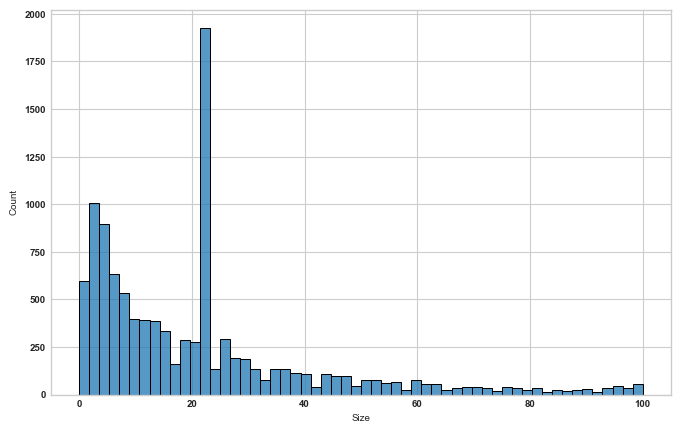

In [39]:
sns.histplot(data=google.Size)

- Podemos observar que la distribución del peso en Megabytes de las aplicaciones tiene un peso mayor en las cantidades pequeñas
- También que la media y la moda coinciden en unos 21.5 Mb 

### "Installs" ------------------------------------------
*Número de instalaciones de la aplicación*

In [40]:
google['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [41]:
google['Installs'].sample(10)

7358         50,000+
2021      1,000,000+
10524            10+
10445     1,000,000+
10510            10+
832      10,000,000+
771         500,000+
8060            100+
2277         10,000+
1508        500,000+
Name: Installs, dtype: object

In [42]:
google['Installs'].isna().sum()

0

Podemos observar que:
- No contiene valores NaN
- Contiene un caracter + que debemos eliminar
- Los números tienen el caracter ',' que también deberemos eliminar
- Es de tipo 'object' cuando debería ser de tipo 'integer' ya que son instalaciones unitarias

In [43]:
# Eliminamos el caracter '+'
google['Installs'] = google['Installs'].str.replace('+','')
# Eliminamos el caracter ','
google['Installs'] = google['Installs'].str.replace(',','')
# Pasamos el tipo de dato de la variable a Integer
google['Installs'] = google['Installs'].astype(int)

Comprobamos el estado final

In [44]:
google['Installs'].sample(10)

3081    5000000
745     5000000
6186        100
8504         50
7479     100000
8876          1
7323       1000
6126       1000
6105    1000000
5525    1000000
Name: Installs, dtype: int32

In [45]:
google['Installs'].mean()

15464338.882564576

In [46]:
google['Installs'].mode()

0    1000000
Name: Installs, dtype: int32

- Podemos observar que la media está en más de 15 millones, mientras que la moda está en 1 millón de instalaciones

### "Type" ------------------------------------------
*Tipo de Aplicación, gratuita o de pago (Free/Paid)*

In [47]:
google['Type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [48]:
google['Type'].sample(10)

8700    Free
9571    Free
6870    Free
5519    Free
1945    Free
5935    Free
6607    Free
6610    Free
2346    Free
6882    Free
Name: Type, dtype: object

In [49]:
google['Type'].isna().sum()

1

- Como podemos ver existen al menos 2 opciones de categoría
- Como son variables categóricas, necesitamos convertirlas, para poder usarlo en el modelo de clasificación.
- Pasaremos a usar "OneHotEncoder"
- Lo haremos en un posterior punto, junto a otras variables que también necesiten el uso de OneHotEncoder
- También vemos un registro con NaN, que pasaremos a cambiarlo por el valor mayoritario

In [50]:
google['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

El mayoritario es "Free" por lo que pasamos a agregar este registro al registro con NaN

In [51]:
google['Type'] = google['Type'].fillna('Free')

In [52]:
google['Type'].isna().sum()

0

([<matplotlib.patches.Wedge at 0x1ed0bd2d790>,
 [Text(-1.070566794830964, 0.2527582596184673, 'Free'),
  Text(1.0705667889147297, -0.2527582846768919, 'Paid')],
 [Text(-0.5839455244532531, 0.13786814161007305, '93%'),
  Text(0.5839455212262161, -0.13786815527830465, '7%')])

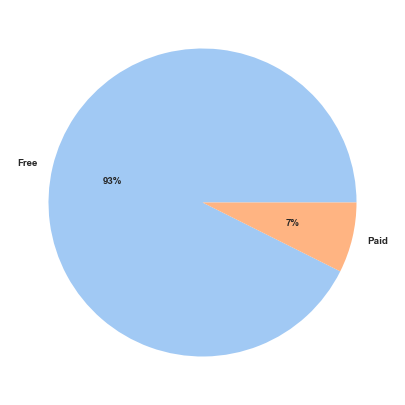

In [53]:
plt.rcParams['font.size'] =7
mpl.rc('axes',  labelsize=7)
mpl.rc('xtick', labelsize=7)
mpl.rc('ytick', labelsize=7)

data = list(google['Type'].value_counts())
labels = google['Type'].value_counts().index.tolist()
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

- Observamos que es aplastante la mayoría de aplicaciones gratuitas con un 93%

### "Price" ------------------------------------------
*Precio de la aplicación*

In [54]:
google['Price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: Price, dtype: object

In [55]:
google['Price'].sample(10)

3887    0
2345    0
5685    0
203     0
3169    0
7845    0
3861    0
3322    0
943     0
8194    0
Name: Price, dtype: object

In [56]:
google['Price'].isna().sum()

0

Observamos que :
- No tienen NaN
- Al intentar pasarlo a integer nos salta un error en algunos valores, que tienen el símbolo '$' y también que algunos precios contienen 2 decimales
- Pasaremos a eliminar los caracteres '$' y pasar los números a float con 2 decimales

In [57]:
# Eliminamos el caracter '$'
google['Price'] = google['Price'].str.replace('$','')
# Pasamos las cantidades a float con 2 decimales
google['Price'] = google['Price'].apply(lambda x: round(float(x),2))
# Pasamos el tipo de dato de la variable a Integer
google['Price'] = google['Price'].astype(float)

Observamos si los cambios son corectos

In [58]:
google['Price'].sample(10)

4014     0.00
1098     0.00
1341     2.99
10019    0.00
3901     0.00
2320     0.00
9430     0.00
9683     0.00
10743    0.00
6045     0.00
Name: Price, dtype: float64

Revisamos los datos de las aplicaciones de pago

In [59]:
data = google[google['Type'] == 'Paid']

In [60]:
# La media
data['Price'].mean()

13.920837499999855

In [61]:
# La moda
data['Price'].mode()

0    0.99
Name: Price, dtype: float64

In [62]:
# Una revisión de las aplicaciones de pago
data['Price'].describe()

count    800.000000
mean      13.920837
std       57.195358
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

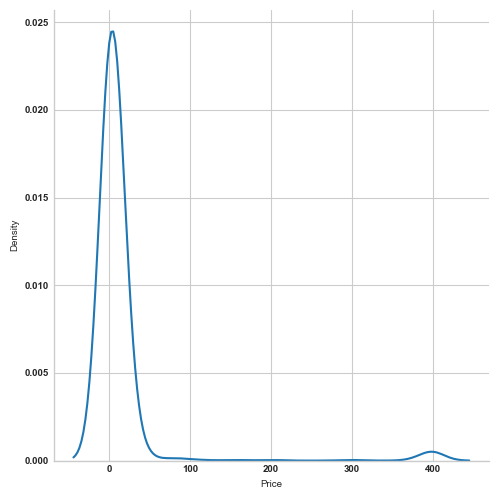

In [63]:
# Gráfica de dispersión
sns.displot(data=data, x='Price', kind="kde")

Observamos que:
- La distribución está agrupada en los valores más bajos
- La media de las aplicaciones de pago es de 13.9
- La moda es de 0.99
- Y finalmente que existen aplicaciones muy caras hasta 400 euros, pero que hasta el tercer cuartil(75%) es de únicamente 4.99

### "Content Rating" ------------------------------------------
*Las edades para las que está clasificada la aplicación*

In [64]:
google['Content Rating'].describe()

count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dtype: object

In [65]:
google['Content Rating'].sample(10)

7708        Everyone
8944        Everyone
2425        Everyone
6919        Everyone
2483        Everyone
2251        Everyone
4033            Teen
5772        Everyone
4150        Everyone
3790    Everyone 10+
Name: Content Rating, dtype: object

In [66]:
google['Content Rating'].isna().sum()

0

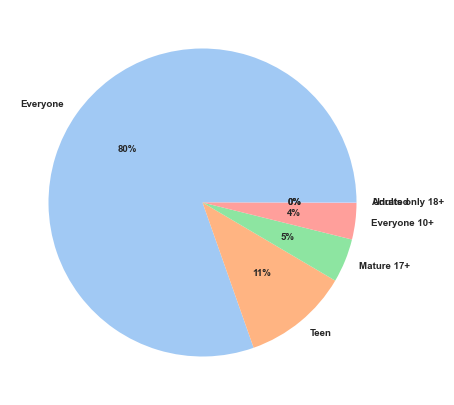

In [67]:
plt.rcParams['font.size'] =7
mpl.rc('axes',  labelsize=7)
mpl.rc('xtick', labelsize=7)
mpl.rc('ytick', labelsize=7)

data = list(google['Content Rating'].value_counts())
labels = google['Content Rating'].value_counts().index.tolist()
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%');

Observamos que :
- Existen al menos 6 opciones de categoría
- La más numerosa es la de "Everyone" conun 80%, seguida de la de "Teen" con un 11%
- Como son variables categóricas, necesitamos convertirlas, para poder usarlo en el modelo de clasificación.
- Pasaremos a usar "OneHotEncoder"
- Lo haremos en un posterior punto, junto a otras variables que también necesiten el uso de OneHotEncoder

### "Genres" ------------------------------------------
*Categoría de género de aplicación*

In [68]:
google['Genres'].describe()

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [69]:
google['Genres'].sample(10)

9210     Travel & Local
7988      Entertainment
7256    Personalization
6401             Casual
7447           Business
7943           Business
7794      Entertainment
6624             Events
4629      Communication
9700          Education
Name: Genres, dtype: object

- Como podemos ver existen al menos 119 opciones únicas de categoría
- También observamos que los valores a veces se encuantran con más de una categoría separadas por ';', por lo que una aplicación puede tener más de una categoría, y eso deberemos tenerlo en cuenta
- Como son variables categóricas, necesitamos convertirlas, para poder usarlo en el modelo de clasificación.
- Pasaremos a usar "OneHotEncoder"
- Lo haremos en un posterior punto, junto a otras variables que también necesiten el uso de OneHotEncoder

### "Last Updated" ------------------------------------------
*Fecha de la última actualización de la aplicación*

In [70]:
google['Last Updated'].describe()

count              10840
unique              1377
top       August 3, 2018
freq                 326
Name: Last Updated, dtype: object

In [71]:
google['Last Updated'].sample(10)

7297         July 30, 2014
7385     September 1, 2015
5768         July 16, 2018
1594          July 3, 2018
42           July 30, 2018
5452     November 21, 2017
9609     December 20, 2017
33         January 6, 2018
7133    September 13, 2016
3086          May 15, 2018
Name: Last Updated, dtype: object

Podemos observar que:
- Es una variable tipo 'object' categórica
- No podemos usar este tipo de datos para los modelos de Predicción
- En todo caso, deberemos pasar los datos a nuevas columnas independientes con el año, mes e incluso día aunque no es una información muy interesante
- De todas formas en este estudio obviaremos esta columna, por lo que pasaremos a eliminarla.

In [72]:
google.drop(["Last Updated"],axis=1, inplace=True)

Comprobamos los cambios realizados en el dataset

In [73]:
google.sample(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
9653,BUSINESS,4.2,0,11.0,10,Free,0.0,Teen,Business,v2.7.11.27,4.1 and up
6939,PHOTOGRAPHY,3.9,205,2.4,50000,Free,0.0,Everyone,Photography,1.0.5,4.0 and up
9324,PRODUCTIVITY,4.2,3,4.4,100,Free,0.0,Everyone,Productivity,4.2,4.0.3 and up
9038,FAMILY,4.3,1894,40.0,100000,Free,0.0,Mature 17+,Simulation,1.441,2.3 and up
2711,SHOPPING,4.3,213735,43.0,10000000,Free,0.0,Everyone,Shopping,5.3.73,4.4 and up
10272,SPORTS,4.5,5675,49.0,100000,Free,0.0,Everyone,Sports,3.0.10,4.1 and up
7572,PHOTOGRAPHY,4.6,847144,4.2,10000000,Free,0.0,Everyone,Photography,4.7.4,4.0 and up
1438,HEALTH_AND_FITNESS,4.6,111455,21.5,5000000,Free,0.0,Everyone,Health & Fitness,Varies with device,Varies with device
27,ART_AND_DESIGN,4.1,203,6.1,100000,Free,0.0,Everyone,Art & Design,1.03,4.0.3 and up
4049,VIDEO_PLAYERS,4.5,1013867,32.0,50000000,Free,0.0,Everyone,Video Players & Editors,4.5.0.10701.GP,4.1 and up


### "Current Ver" ------------------------------------------
*Número de la versión de la aplicación*

In [74]:
google['Current Ver'].describe()

count                  10832
unique                  2831
top       Varies with device
freq                    1459
Name: Current Ver, dtype: object

Podemos observar que :
- No es un dato útil, ya que cada versión de las aplicaciones es diferentes, y no se puede hacer una correlación entre el número de versión y el Rating, ya que es algo subjetivo del equipo de desarrollo
- Pasamos a la elminación de esta variable

In [75]:
google.drop(["Current Ver"],axis=1, inplace=True)

### "Android Ver" ------------------------------------------
*Número de versión del sistema operativo para la que está diseñada la aplicación*

In [76]:
google['Android Ver'].describe()

count          10838
unique            33
top       4.1 and up
freq            2451
Name: Android Ver, dtype: object

In [77]:
google['Android Ver'].sample(10)

851            4.0.3 and up
3440     Varies with device
397              2.3 and up
4709             4.1 and up
3249     Varies with device
2448             4.1 and up
9486           4.0.3 and up
9289             4.3 and up
10185            4.1 and up
717              4.4 and up
Name: Android Ver, dtype: object

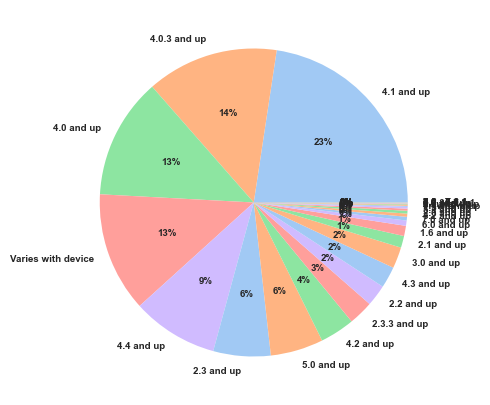

In [78]:
plt.rcParams['font.size'] =7
mpl.rc('axes',  labelsize=7)
mpl.rc('xtick', labelsize=7)
mpl.rc('ytick', labelsize=7)

data = list(google['Android Ver'].value_counts())
labels = google['Android Ver'].value_counts().index.tolist()
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%');

Podemos observar que :
- La más numerosas son:
    - 4.1 and up        23%
    - 4.0.3 and up      14%
    - 4.0 and up        13%
    - Varies con Device 13%
- Es una columna categórica.
- Como son variables categóricas, necesitamos convertirlas, para poder usarlo en el modelo de clasificación.
- Pasaremos a usar "OneHotEncoder"
- Lo haremos en un posterior punto, junto a otras variables que también necesiten el uso de OneHotEncoder


---
---

## Uso de OneHotEncoder para la gestión de las columnas categorizadas
---

Ante de nada realizaremos un Backup de los datos por si necesitáramos volver al estado anterior

In [79]:
# Haremos una copia para ver los resultados 
google_backup = google.copy()

Crearemos una nueva variable con el Dataframe Normalizado llamdo "titanic_norm"

In [80]:
google_norm = google.copy()

Llamamos a la librería "OneHotEncoder" de Sklearn

In [81]:
# Declaramos la librería OneHotEncoder de sklearn
from sklearn.preprocessing import OneHotEncoder

Usamos el método con cada una de las columnas categóricas, empezando por


#### Category -----------------------------------

In [82]:
# agregamos la columna a la variable
cat_cat = google[ ["Category"] ]
# Llamamor al método
cat_encoder =OneHotEncoder(sparse=False)
# para la categoria 
cat_cat_1hot = cat_encoder.fit_transform(cat_cat)

# Agregar las columnas nuevas por cada categoría
google_norm.reset_index(drop=False, inplace=True)
google_norm=google_norm.join(pd.DataFrame(cat_cat_1hot, columns=[cat for cat in cat_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
google_norm=google_norm.drop(["Category","index"], axis=1)
# Mostramos el resultado
google_norm.info()
google_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               10840 non-null  float64
 1   Reviews              10840 non-null  int32  
 2   Size                 10840 non-null  float64
 3   Installs             10840 non-null  int32  
 4   Type                 10840 non-null  object 
 5   Price                10840 non-null  float64
 6   Content Rating       10840 non-null  object 
 7   Genres               10840 non-null  object 
 8   Android Ver          10838 non-null  object 
 9   ART_AND_DESIGN       10840 non-null  float64
 10  AUTO_AND_VEHICLES    10840 non-null  float64
 11  BEAUTY               10840 non-null  float64
 12  BOOKS_AND_REFERENCE  10840 non-null  float64
 13  BUSINESS             10840 non-null  float64
 14  COMICS               10840 non-null  float64
 15  COMMUNICATION        10840 non-null 

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,ART_AND_DESIGN,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,4.2 and up,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Type -----------------------------------------

In [83]:
# agregamos la columna a la variable
type_cat = google[ ["Type"] ]
# Llamamor al método
type_encoder =OneHotEncoder(sparse=False)
# para la categoria 
type_cat_1hot = type_encoder.fit_transform(type_cat)

# Agregar las columnas nuevas por cada categoría
google_norm.reset_index(drop=False, inplace=True)
google_norm=google_norm.join(pd.DataFrame(type_cat_1hot, columns=[cat for cat in type_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
google_norm=google_norm.drop(["Type","index"], axis=1)
# Mostramos el resultado
google_norm.info()
google_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               10840 non-null  float64
 1   Reviews              10840 non-null  int32  
 2   Size                 10840 non-null  float64
 3   Installs             10840 non-null  int32  
 4   Price                10840 non-null  float64
 5   Content Rating       10840 non-null  object 
 6   Genres               10840 non-null  object 
 7   Android Ver          10838 non-null  object 
 8   ART_AND_DESIGN       10840 non-null  float64
 9   AUTO_AND_VEHICLES    10840 non-null  float64
 10  BEAUTY               10840 non-null  float64
 11  BOOKS_AND_REFERENCE  10840 non-null  float64
 12  BUSINESS             10840 non-null  float64
 13  COMICS               10840 non-null  float64
 14  COMMUNICATION        10840 non-null  float64
 15  DATING               10840 non-null 

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,...,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Free,Paid
0,4.1,159,19.0,10000,0.0,Everyone,Art & Design,4.0.3 and up,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.9,967,14.0,500000,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.7,87510,8.7,5000000,0.0,Everyone,Art & Design,4.0.3 and up,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.5,215644,25.0,50000000,0.0,Teen,Art & Design,4.2 and up,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,967,2.8,100000,0.0,Everyone,Art & Design;Creativity,4.4 and up,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Content Rating -------------------------------------------

In [84]:
# agregamos la columna a la variable
cont_cat = google[ ["Content Rating"] ]
# Llamamor al método
cont_encoder =OneHotEncoder(sparse=False)
# para la categoria 
cont_cat_1hot = cont_encoder.fit_transform(cont_cat)

# Agregar las columnas nuevas por cada categoría
google_norm.reset_index(drop=False, inplace=True)
google_norm=google_norm.join(pd.DataFrame(cont_cat_1hot, columns=[cat for cat in cont_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
google_norm=google_norm.drop(["Content Rating","index"], axis=1)
# Mostramos el resultado
google_norm.info()
google_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               10840 non-null  float64
 1   Reviews              10840 non-null  int32  
 2   Size                 10840 non-null  float64
 3   Installs             10840 non-null  int32  
 4   Price                10840 non-null  float64
 5   Genres               10840 non-null  object 
 6   Android Ver          10838 non-null  object 
 7   ART_AND_DESIGN       10840 non-null  float64
 8   AUTO_AND_VEHICLES    10840 non-null  float64
 9   BEAUTY               10840 non-null  float64
 10  BOOKS_AND_REFERENCE  10840 non-null  float64
 11  BUSINESS             10840 non-null  float64
 12  COMICS               10840 non-null  float64
 13  COMMUNICATION        10840 non-null  float64
 14  DATING               10840 non-null  float64
 15  EDUCATION            10840 non-null 

,Rating,Reviews,Size,Installs,Price,Genres,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,VIDEO_PLAYERS,WEATHER,Free,Paid,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,19.0,10000,0.0,Art & Design,4.0.3 and up,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.9,967,14.0,500000,0.0,Art & Design;Pretend Play,4.0.3 and up,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.7,87510,8.7,5000000,0.0,Art & Design,4.0.3 and up,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.5,215644,25.0,50000000,0.0,Art & Design,4.2 and up,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,967,2.8,100000,0.0,Art & Design;Creativity,4.4 and up,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Android Ver -------------------------------------

Comprobamos los NaN del Dataset para esta variable y encontramos 2

In [85]:
google_norm['Android Ver'].isna().sum()

2

Los eliminamos

In [86]:
google_norm.dropna(subset=['Android Ver'], inplace=True)

Comprobamos que ya no están

In [87]:
google_norm['Android Ver'].isna().sum()

0

In [88]:
# agregamos la columna a la variable
an_cat = google[ ["Android Ver"] ]
# Llamamor al método
an_encoder =OneHotEncoder(sparse=False)
# para la categoria 
an_cat_1hot = an_encoder.fit_transform(an_cat)

# Agregar las columnas nuevas por cada categoría
google_norm.reset_index(drop=False, inplace=True)
google_norm=google_norm.join(pd.DataFrame(an_cat_1hot, columns=[cat for cat in an_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
google_norm=google_norm.drop(["Android Ver","index"], axis=1)
# Mostramos el resultado
google_norm.info()
google_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               10838 non-null  float64
 1   Reviews              10838 non-null  int32  
 2   Size                 10838 non-null  float64
 3   Installs             10838 non-null  int32  
 4   Price                10838 non-null  float64
 5   Genres               10838 non-null  object 
 6   ART_AND_DESIGN       10838 non-null  float64
 7   AUTO_AND_VEHICLES    10838 non-null  float64
 8   BEAUTY               10838 non-null  float64
 9   BOOKS_AND_REFERENCE  10838 non-null  float64
 10  BUSINESS             10838 non-null  float64
 11  COMICS               10838 non-null  float64
 12  COMMUNICATION        10838 non-null  float64
 13  DATING               10838 non-null  float64
 14  EDUCATION            10838 non-null  float64
 15  ENTERTAINMENT        10838 non-null 

,Rating,Reviews,Size,Installs,Price,Genres,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,5.0 - 8.0,5.0 and up,5.1 and up,6.0 and up,7.0 - 7.1.1,7.0 and up,7.1 and up,8.0 and up,Varies with device,NaN
0,4.1,159,19.0,10000,0.0,Art & Design,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9,967,14.0,500000,0.0,Art & Design;Pretend Play,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.7,87510,8.7,5000000,0.0,Art & Design,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.5,215644,25.0,50000000,0.0,Art & Design,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.3,967,2.8,100000,0.0,Art & Design;Creativity,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Aparece una columna extraña despúes de hacer el OneHotEnconder con el título NaN que nos interfiere en los modelos, y pasamos a aliminarla

In [89]:
google_norm = google_norm.iloc[:, :-1]

Revisamos y los datos ahora son correctos

In [90]:
google_norm.head()

,Rating,Reviews,Size,Installs,Price,Genres,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,5.0 - 7.1.1,5.0 - 8.0,5.0 and up,5.1 and up,6.0 and up,7.0 - 7.1.1,7.0 and up,7.1 and up,8.0 and up,Varies with device
0,4.1,159,19.0,10000,0.0,Art & Design,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9,967,14.0,500000,0.0,Art & Design;Pretend Play,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.7,87510,8.7,5000000,0.0,Art & Design,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.5,215644,25.0,50000000,0.0,Art & Design,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.3,967,2.8,100000,0.0,Art & Design;Creativity,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Genres -----------------------------------------------

- Aquí tenemos el problema que algunos de los géneros coinciden con las Categorías (Category)
- Además, en esta variable, existen valores con más de una categoría separadas con ";"

Realizaremos una separación entre género1 y género 2

In [91]:
# Separar los valores en diferentes columnas
google_norm[['genero1', 'genero2']] = google_norm['Genres'].str.split(';', expand=True)

# Eliminar la columna original de géneros
google_norm.drop('Genres', axis=1, inplace=True)

# Crear instancia de OneHotEncoder
encoder = OneHotEncoder()

# Aplicar OneHotEncoder a los datos
datos_codificados = encoder.fit_transform(google_norm[['genero1', 'genero2']])

# Convertimos la salida a un DataFrame de Pandas
datos_codificados_df = pd.DataFrame.sparse.from_spmatrix(datos_codificados, columns=encoder.get_feature_names_out(['genero1', 'genero2']))

# Modificar los nombres de las columnas del DataFrame codificado para que coincidan con las categorías
datos_codificados_df.columns = datos_codificados_df.columns.str.upper().str.replace(' ', '_').str.replace('&', 'AND')

# Concatenamos el DataFrame codificado con el DataFrame original
google_norm = pd.concat([google_norm, datos_codificados_df], axis=1)

# Eliminar las columnas creadas género1 y genero2 que ya no es necesario después de aplicar OneHotEncoder
google_norm = google_norm.drop(['genero1', 'genero2'], axis=1)


In [92]:
google_norm.columns.tolist()

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER',
 'Free',
 'Paid',
 'Adults only 18+',
 'Everyone',
 'Everyone 10+',
 'Mature 17+',
 'Teen',
 'Unrated',
 '1.0 and up',
 '1.5 and up',
 '1.6 and up',
 '2.0 and up',
 '2.0.1 and up',
 '2.1 and up',
 '2.2 - 7.1.1',
 '2.2 and up',
 '2.3 and up',
 '2.3.3 and up',
 '3.0 and up',
 '3.1 and up',
 '3.2 and up',
 '4.0 and up',
 '4.0.3 - 7.1.1',
 '4.0.3 and up',
 '4.1 - 7.1.1',
 '4.1 and up',
 '4.2 and up',
 '4.3 and up',
 '4.4 

Ahora tenemos columnas que empieza el nombre por GENERO1_ y GENERO2_ que coinciden con las categorías generales, por lo que pasamos a fucionarlas, tanto entre ellas, como con las categorías, ya que muchas coinciden, como podemos ver en la lista anterior

In [93]:
# Obtener las columnas que necesitan fusionarse
cols_to_merge = [col for col in google_norm.columns if 'GENERO1_' in col or 'GENERO2_' in col]

# Fusionar columnas
for col in set(cols_to_merge):
    col_names = [c for c in google_norm.columns if c.endswith(col[8:])]
    if len(col_names) > 1:
        google_norm[col] = google_norm[col_names].max(axis=1)
        google_norm.drop(col_names, axis=1, inplace=True)

# Modificar los nombres de las columnas
google_norm.columns = google_norm.columns.str.replace('GENERO1_', '').str.replace('GENERO2_', '')

# Eliminar columnas de género1 y género2
google_norm = google_norm.loc[:,~google_norm.columns.str.startswith('GENERO1_') & ~google_norm.columns.str.startswith('GENERO2_')]


Comprobamos que ha surtido efecto el cambio deseado

In [94]:
google_norm.columns.tolist()

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'FAMILY',
 'GAME',
 'VIDEO_PLAYERS',
 'Free',
 'Paid',
 'Adults only 18+',
 'Everyone',
 'Everyone 10+',
 'Mature 17+',
 'Teen',
 'Unrated',
 '1.0 and up',
 '1.5 and up',
 '1.6 and up',
 '2.0 and up',
 '2.0.1 and up',
 '2.1 and up',
 '2.2 - 7.1.1',
 '2.2 and up',
 '2.3 and up',
 '2.3.3 and up',
 '3.0 and up',
 '3.1 and up',
 '3.2 and up',
 '4.0 and up',
 '4.0.3 - 7.1.1',
 '4.0.3 and up',
 '4.1 - 7.1.1',
 '4.1 and up',
 '4.2 and up',
 '4.3 and up',
 '4.4 and up',
 '4.4W and up',
 '5.0 - 6.0',
 '5.0 - 7.1.1',
 '5.0 - 8.0',
 '5.0 and up',
 '5.1 and up',
 '6.0 and up',
 '7.0 - 7.1.1',
 '7.0 and up',
 '7.1 and up',
 '8.0 and up',
 'Varies with device',
 'ACTION',
 'ARCADE',
 'BOARD',
 'CARD',
 'CASINO',
 'CASUAL',
 'EDUCATIONAL',
 'MUSIC',
 'MUSIC_AND_AUDIO',
 'PUZZLE',
 'RACING',
 'ROLE_PLAYING',
 'SIMULATION',
 'STRATEGY',
 'TRIVIA',
 'VIDEO_PLAYERS_AND_EDITORS',
 'WORD',
 'BRAIN_GAMES',
 'CREATIVITY',
 'MUSIC_AND_VIDEO',
 'PRETEND_P

In [95]:
google_norm.head()

,Rating,Reviews,Size,Installs,Price,FAMILY,GAME,VIDEO_PLAYERS,Free,Paid,...,SIMULATION,STRATEGY,TRIVIA,VIDEO_PLAYERS_AND_EDITORS,WORD,BRAIN_GAMES,CREATIVITY,MUSIC_AND_VIDEO,PRETEND_PLAY,NONE
0,4.1,159,19.0,10000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.9,967,14.0,500000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.7,87510,8.7,5000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.5,215644,25.0,50000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.3,967,2.8,100000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Eliminamos la columna de NONE, ya que es aquella en la que no existe un segundo género

In [96]:
google_norm = google_norm.drop('NONE', axis=1)

Ahora gestionaremos las columnas duplicadas y los géneros que coincidan con las categorías


---
---

## Estudio numérico de la correlación entre los datos para obtener información relevante
---

# Buscando correlaciones

Aquí nos damos cuenta de la necesidad de la normalización del modelo para que las correlaciones puedan ser medidas

In [97]:
corr_matrix = google_norm.corr()
corr_matrix["Rating"].sort_values(ascending=False)

Rating                       1.000000
Size                         0.074076
Reviews                      0.067679
GAME                         0.064519
Installs                     0.050814
                               ...   
2.0.1 and up                -0.024644
Mature 17+                  -0.029162
VIDEO_PLAYERS               -0.031404
VIDEO_PLAYERS_AND_EDITORS   -0.031868
Free                        -0.035851
Name: Rating, Length: 70, dtype: float64

- Podemos observar una muy pobre correlación positiva o negativa en la relación al 'Rating' no superior al 8%.

---
---
---

# Entrenando modelos de Clasificación
---

### Necesidad para los modelos que Rating sea una variable discreta y no continua
---

In [98]:
google_norm['Rating'] = google_norm['Rating'].round(1) # Redondear a la décima más cercana
google_norm['Rating'] = google_norm['Rating'].astype(int) # Convertir a tipo int

## Creación del Train y Test Set
---

Necesitamos crear, del total de datos del Dataset, una subdivisión. Una parte será para entrenar al modelo (TrainSet) y otro para comprobar el resultado del entrenamiento (TestSet)

Usaremos un método de la librería "sklearn"

In [99]:
from sklearn.model_selection import train_test_split

Aplicaremos normalmente una división 80/20. Otros ratios pueden ser 70:30, 60:40, e incluso 50:50, pero en este caso usaremos el primero, ya que es el más común.

Aplicaremos normalmente una división 80/20. Otros ratios pueden ser 70:30, 60:40, e incluso 50:50, pero en este caso usaremos el primero, ya que es el más común.

In [100]:
# Agreagamos el ratio de split
ratio = 0.2
# Ejecutamos la función
X_train, X_test, y_train, y_test = train_test_split(google_norm.drop('Rating', axis=1), google_norm['Rating'], test_size=0.2, random_state=42)
# Revisamos el número de filas en cada Set
print('Número de filas Total del dataset : ',len(google_norm))
print('Ratio : ', 100-100*ratio, '/',ratio*100) 
print('Número de filas por dataset :')
print('TrainSet : ',len(X_train))
print('TestSet  : ', len(X_test))


Número de filas Total del dataset :  10838
Ratio :  80.0 / 20.0
Número de filas por dataset :
TrainSet :  8670
TestSet  :  2168


---
---

###  Técnica del sobremuestreo 
---
-  Como hemos dicho anteriormente aplicaremos la técnica del sobremuestreo en las clases minoritarias con el método SMOTE de la librería "imblearn", y veremos como se comportan con y sin sobremuestreo


In [139]:
google_norm['Rating'].value_counts()

4    8566
3    1711
5     274
2     231
1      56
Name: Rating, dtype: int64

In [140]:
from imblearn.over_sampling import SMOTE

# Crear una instancia de SMOTE y sobremuestrear a cantidades más altas que el dataset de entrenamiento
sampling_strategy = {1: 2000, 2: 2000, 3: 2000, 4: 8566, 5: 2000}
smote = SMOTE(sampling_strategy=sampling_strategy)
X_sobre, y_sobre = smote.fit_resample(X_train, y_train)


## Aumentar la precisión con StandarScaler
---

#### Esté método lo que realiza en una transformación de variables discretas a contínuas, aumentando la precisión del modelo, de hasta un 10%

In [141]:
# Declara la librería
from sklearn.preprocessing import StandardScaler
# Declara un objeto/clase StandarScaler
scaler = StandardScaler()
# Realiza la conversión a escala 
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_sobre_scaled = scaler.fit_transform(X_sobre.astype(np.float64))


---
---

# ENTRENAMIENTO DE LOS MODELOS
---

In [102]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Como el numero de registros totales del dataset de Train es de 1600, le correspondería un k-fold(para el cv) de:
- 8600/10 = 860, lo cual es demasiado esfuerzo computacionalmente hablando, por lo que le asignamos k=50

PERO otendremos un warning, porque algunas de las clases no están lo suficientemente representadas en las divisiones, por lo que podemos hacer uso de la librería KFold para realizar un shuffle(baraja) para habilitar la estratificación, que asegurará que todas las clases tengan una representación igual

In [103]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=50, shuffle=True)

#### Para los modelos seguiremos usando el dataset con precisión aumentada con StandarScaler "X_train_scaled"

## Casificador SVC  'Support Vector Classification'
---

- En el algoritmo SVC se utiliza la técnica de optimización de descenso de gradiente para encontrar el hiperplano que maximiza el margen. También utiliza una técnica de regularización para evitar el sobreajuste y mejorar la generalización del modelo.

Importamos librería

In [104]:
from sklearn.svm import SVC;

Ajustar el modelo normal y entrenarlo

In [105]:
# Ajustar el modelo
svm_clf = SVC(gamma="auto", random_state=42)
# Entrenarlo con el dataset de Entrenamiento
svm_clf.fit(X_train_scaled, y_train)
# Predicción del modelo
y_train_pred_svm = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=kf)

Ajustar el modelo sobremuestreado y entrenarlo

In [148]:
# Ajustar el modelo
svm_clf_sobre = SVC(gamma="auto", random_state=42)
# Entrenarlo con el dataset de Entrenamiento
svm_clf_sobre.fit(X_sobre_scaled, y_sobre)
# Predicción del modelo
y_sobre_pred_svm = cross_val_predict(svm_clf_sobre, X_sobre_scaled, y_sobre, cv=kf)

Realizar predicciones para el grupo de TEST con el modelo normal

In [106]:
# Predicción del modelo con el TEST
y_test_pred_svm = cross_val_predict(svm_clf, X_test, y_test, cv=kf)

Realizar predicciones para el grupo de TEST con el modelo sobremuestreado

In [149]:
# Predicción del modelo con el TEST sobremuestreado
y_testsobre_pred_svm = cross_val_predict(svm_clf_sobre, X_test, y_test, cv=kf)

#### Matrices de Confusión
---

In [107]:
# Ver la matriz de decisión del modelo normal 
cm = confusion_matrix(y_train, y_train_pred_svm)
cm

array([[   0,    0,    0,   48,    0],
       [   0,    0,    0,  183,    0],
       [   0,    0,    0, 1369,    0],
       [   0,    0,   16, 6829,    0],
       [   0,    0,    0,  225,    0]], dtype=int64)

In [143]:
# Ver la matriz de decisión del modelo sobremuestreado 
cm = confusion_matrix(y_sobre, y_sobre_pred_svm)
cm

array([[1105,   56,    0,  804,   35],
       [ 209,  594,    0, 1106,   91],
       [  62,   60,   54, 1745,   79],
       [ 127,  155,   25, 8107,  152],
       [ 158,  123,    0, 1123,  596]], dtype=int64)

In [108]:
# Ver la matriz de decisión del modelo de TEST normal
cm = confusion_matrix(y_test, y_test_pred_svm)
cm

array([[   0,    0,    0,    8,    0],
       [   0,    2,    1,   45,    0],
       [   0,    0,    5,  337,    0],
       [   0,    1,   17, 1702,    1],
       [   0,    0,    0,   49,    0]], dtype=int64)

In [151]:
# Ver la matriz de decisión del modelo de TEST sobremuestreado
cm = confusion_matrix(y_test, y_testsobre_pred_svm)
cm

array([[   0,    0,    0,    8,    0],
       [   0,    2,    1,   45,    0],
       [   0,    0,    5,  337,    0],
       [   1,    0,   17, 1702,    1],
       [   0,    0,    0,   49,    0]], dtype=int64)

## Casificador 'OneVsRestClassifier'
---

- Este clasificador funciona realizando una clasificación multiclase mediante la conversión en múltiples de clasificación binaria

Cargamos la librería

In [109]:
from sklearn.multiclass import OneVsRestClassifier;

Ajustar el modelo, entrenarlo y realizar predicciones para el grupo de entrenamiento normal

In [110]:
# Definimos el modelo
ovr_clf = OneVsRestClassifier( SVC(gamma="auto", random_state=42) )
# Lo entrenamos con el dataset
ovr_clf.fit(X_train, y_train)
# Predicción del modelo
y_train_pred_ovr = cross_val_predict(ovr_clf, X_train_scaled, y_train, cv=kf)

Ajustar el modelo sobremuestreado y entrenarlo

In [152]:
# Ajustar el modelo
ovr_clf_sobre = SVC(gamma="auto", random_state=42)
# Entrenarlo con el dataset de Entrenamiento
ovr_clf_sobre.fit(X_sobre_scaled, y_sobre)
# Predicción del modelo
y_sobre_pred_ovr = cross_val_predict(ovr_clf_sobre, X_sobre_scaled, y_sobre, cv=kf)

Realizar predicciones para el grupo de TEST con el modelo normal

In [111]:
# Predicción del modelo con el TEST
y_test_pred_ovr = cross_val_predict(ovr_clf, X_test, y_test, cv=kf)

Realizar predicciones para el grupo de TEST con el modelo sobremuestreado

In [153]:
# Predicción del modelo con el TEST sopremuestreado
y_testsobre_pred_ovr = cross_val_predict(ovr_clf_sobre, X_test, y_test, cv=kf)

#### Matrices de Confusión
---

In [112]:
# Ver la matriz de decisión del modelo normal 
cm = confusion_matrix(y_train, y_train_pred_ovr)
cm

array([[   0,    0,    0,   48,    0],
       [   0,    0,    0,  183,    0],
       [   0,    0,    0, 1369,    0],
       [   0,    0,   16, 6829,    0],
       [   0,    0,    0,  225,    0]], dtype=int64)

In [154]:
# Ver la matriz de decisión del modelo sobremuestreado 
cm = confusion_matrix(y_sobre, y_sobre_pred_ovr)
cm

array([[1104,   54,    0,  805,   37],
       [ 214,  591,    1, 1104,   90],
       [  64,   59,   57, 1744,   76],
       [ 129,  157,   29, 8097,  154],
       [ 154,  122,    1, 1134,  589]], dtype=int64)

In [113]:
# Ver la matriz de decisión del modelo de TEST normal
cm = confusion_matrix(y_test, y_test_pred_ovr)
cm

array([[   0,    0,    0,    8,    0],
       [   0,    2,    1,   45,    0],
       [   0,    0,   11,  331,    0],
       [   1,    2,   15, 1702,    1],
       [   0,    0,    0,   49,    0]], dtype=int64)

In [155]:
# Ver la matriz de decisión del modelo de TEST sobremuestreado
cm = confusion_matrix(y_test, y_testsobre_pred_ovr)
cm

array([[   0,    0,    0,    8,    0],
       [   0,    2,    1,   45,    0],
       [   0,    0,    5,  337,    0],
       [   1,    0,   16, 1703,    1],
       [   0,    0,    0,   49,    0]], dtype=int64)

## Casificador SGD 'Descenso del gradiente' o 'Stochastic Gradient Descent'
---

- Este modelo iterativo, realizará una comprobación constante de la funcion coste o pérdida hacie el máximo descenso hacia el equilibrio en las puntuaciones

Para esto usaremos el 'Descenso del gradiente' o 'Stochastic Gradient Descent', y para ello empezaremos por importar las librerías

In [114]:
from sklearn.linear_model import SGDClassifier

Ajustar el modelo, entrenarlo y realizar predicciones para el grupo de entrenamiento normal

In [115]:
# Ajustar el modelo
sgd_clf = SVC(gamma="auto", random_state=42)
# Entrenarlo con el dataset de Entrenamiento
sgd_clf.fit(X_train_scaled, y_train)
# Predicción del modelo
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=kf)

Ajustar el modelo sobremuestreado y entrenarlo

In [156]:
# Ajustar el modelo
sgd_clf_sobre = SVC(gamma="auto", random_state=42)
# Entrenarlo con el dataset de Entrenamiento
sgd_clf_sobre.fit(X_sobre_scaled, y_sobre)
# Predicción del modelo
y_sobre_pred_sgd = cross_val_predict(sgd_clf_sobre, X_sobre_scaled, y_sobre, cv=kf)

Realizar predicciones para el grupo de TEST con el modelo normal

In [116]:
# Predicción del modelo con el TEST
y_test_pred_sgd = cross_val_predict(sgd_clf, X_test, y_test, cv=kf)

Realizar predicciones para el grupo de TEST con el modelo sobremuestreado

In [157]:
# Predicción del modelo con el TEST sobremuestreado
y_testsobre_pred_sgd = cross_val_predict(sgd_clf_sobre, X_test, y_test, cv=kf)

#### Matrices de Confusión
---

In [117]:
# Ver la matriz de decisión del modelo normal 
cm = confusion_matrix(y_train, y_train_pred_sgd)
cm

array([[   0,    0,    0,   48,    0],
       [   0,    0,    0,  183,    0],
       [   0,    0,    0, 1369,    0],
       [   0,    0,   16, 6829,    0],
       [   0,    0,    0,  225,    0]], dtype=int64)

In [158]:
# Ver la matriz de decisión del modelo sobremuestreado 
cm = confusion_matrix(y_sobre, y_sobre_pred_sgd)
cm

array([[1104,   55,    0,  805,   36],
       [ 212,  594,    1, 1107,   86],
       [  62,   61,   54, 1745,   78],
       [ 130,  153,   28, 8106,  149],
       [ 157,  119,    0, 1128,  596]], dtype=int64)

In [118]:
# Ver la matriz de decisión del modelo de TEST normal 
cm = confusion_matrix(y_test, y_test_pred_sgd)
cm

array([[   0,    0,    0,    8,    0],
       [   0,    2,    2,   44,    0],
       [   0,    0,    5,  337,    0],
       [   1,    0,   16, 1703,    1],
       [   0,    0,    0,   49,    0]], dtype=int64)

In [159]:
# Ver la matriz de decisión del modelo de TEST sobremuestreado
cm = confusion_matrix(y_test, y_testsobre_pred_sgd)
cm

array([[   0,    0,    0,    8,    0],
       [   0,    2,    1,   45,    0],
       [   0,    0,    6,  336,    0],
       [   1,    0,   16, 1704,    0],
       [   0,    0,    0,   49,    0]], dtype=int64)

---


## Eficiencia de los modelos de clasificación
---


### Casificador SVC  'Support Vector Classification'
---

Modelo normal

In [119]:
svm_scaled = cross_val_score(svm_clf,X_train_scaled,y_train,cv=kf, scoring="accuracy")
svm_scaled

array([0.77011494, 0.72413793, 0.78735632, 0.79885057, 0.76436782,
       0.77586207, 0.74712644, 0.81609195, 0.75287356, 0.77586207,
       0.79885057, 0.79885057, 0.77011494, 0.7816092 , 0.7816092 ,
       0.77586207, 0.78735632, 0.77011494, 0.83333333, 0.79310345,
       0.77456647, 0.83815029, 0.80346821, 0.82080925, 0.76878613,
       0.84393064, 0.79768786, 0.75722543, 0.80346821, 0.78612717,
       0.80346821, 0.83815029, 0.80346821, 0.80924855, 0.79190751,
       0.76878613, 0.76300578, 0.78612717, 0.79768786, 0.77456647,
       0.78612717, 0.76878613, 0.78612717, 0.79768786, 0.75722543,
       0.79768786, 0.8150289 , 0.77456647, 0.8150289 , 0.75144509])

In [120]:
print(classification_report(y_train, y_train_pred_svm))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00       183
           3       0.00      0.00      0.00      1369
           4       0.79      1.00      0.88      6845
           5       0.00      0.00      0.00       225

    accuracy                           0.79      8670
   macro avg       0.16      0.20      0.18      8670
weighted avg       0.62      0.79      0.70      8670



Modelo sobremuestreado

In [160]:
svm_scaled = cross_val_score(svm_clf_sobre,X_sobre_scaled,y_sobre,cv=kf, scoring="accuracy")
svm_scaled

array([0.59036145, 0.64457831, 0.61144578, 0.59638554, 0.62048193,
       0.61746988, 0.63554217, 0.64759036, 0.6626506 , 0.61144578,
       0.64457831, 0.65662651, 0.64759036, 0.62650602, 0.62650602,
       0.63253012, 0.60120846, 0.58610272, 0.66163142, 0.62839879,
       0.63746224, 0.65558912, 0.66767372, 0.64652568, 0.64350453,
       0.59818731, 0.63444109, 0.63141994, 0.61933535, 0.67069486,
       0.66163142, 0.65558912, 0.58308157, 0.6223565 , 0.67069486,
       0.65558912, 0.60120846, 0.62839879, 0.60120846, 0.63141994,
       0.60120846, 0.61933535, 0.63746224, 0.63444109, 0.63141994,
       0.62839879, 0.6102719 , 0.60725076, 0.63141994, 0.64048338])

In [146]:
print(classification_report(y_sobre, y_sobre_pred_svm))

              precision    recall  f1-score   support

           1       0.67      0.55      0.60      2000
           2       0.60      0.30      0.40      2000
           3       0.68      0.03      0.05      2000
           4       0.63      0.95      0.76      8566
           5       0.63      0.30      0.40      2000

    accuracy                           0.63     16566
   macro avg       0.64      0.42      0.44     16566
weighted avg       0.64      0.63      0.57     16566



### Prueba con el TEST:

Comprobación con el dataset de test del modelo normal

In [121]:
svm_scaled_test = cross_val_score(svm_clf,X_test,y_test,cv=kf, scoring="accuracy")
svm_scaled_test

array([0.75      , 0.70454545, 0.88636364, 0.72727273, 0.79545455,
       0.72727273, 0.81818182, 0.86363636, 0.75      , 0.72727273,
       0.79545455, 0.79545455, 0.75      , 0.79545455, 0.90909091,
       0.75      , 0.84090909, 0.75      , 0.86046512, 0.79069767,
       0.72093023, 0.81395349, 0.79069767, 0.79069767, 0.93023256,
       0.8372093 , 0.8372093 , 0.88372093, 0.72093023, 0.6744186 ,
       0.74418605, 0.76744186, 0.81395349, 0.69767442, 0.88372093,
       0.86046512, 0.6744186 , 0.86046512, 0.79069767, 0.79069767,
       0.62790698, 0.81395349, 0.86046512, 0.86046512, 0.72093023,
       0.81395349, 0.72093023, 0.81395349, 0.88372093, 0.69767442])

In [122]:
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.67      0.04      0.08        48
           3       0.22      0.01      0.03       342
           4       0.79      0.99      0.88      1721
           5       0.00      0.00      0.00        49

    accuracy                           0.79      2168
   macro avg       0.34      0.21      0.20      2168
weighted avg       0.68      0.79      0.71      2168



Comprobación con el dataset de test del modelo sobremuestreado

In [161]:
svm_scaled_test = cross_val_score(svm_clf_sobre,X_test,y_test,cv=kf, scoring="accuracy")
svm_scaled_test

array([0.68181818, 0.88636364, 0.70454545, 0.77272727, 0.72727273,
       0.88636364, 0.81818182, 0.86363636, 0.79545455, 0.75      ,
       0.81818182, 0.77272727, 0.75      , 0.84090909, 0.84090909,
       0.75      , 0.81818182, 0.81818182, 0.81395349, 0.79069767,
       0.86046512, 0.74418605, 0.79069767, 0.76744186, 0.72093023,
       0.74418605, 0.86046512, 0.69767442, 0.74418605, 0.76744186,
       0.8372093 , 0.81395349, 0.74418605, 0.8372093 , 0.88372093,
       0.86046512, 0.74418605, 0.76744186, 0.74418605, 0.74418605,
       0.76744186, 0.76744186, 0.76744186, 0.79069767, 0.79069767,
       0.86046512, 0.81395349, 0.79069767, 0.81395349, 0.76744186])

In [150]:
print(classification_report(y_test, y_testsobre_pred_svm))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       1.00      0.04      0.08        48
           3       0.22      0.01      0.03       342
           4       0.79      0.99      0.88      1721
           5       0.00      0.00      0.00        49

    accuracy                           0.79      2168
   macro avg       0.40      0.21      0.20      2168
weighted avg       0.69      0.79      0.71      2168



### Casificador 'OneVsRestClassifier'
---

Modelo normal

In [123]:
#Realizamos la comprobación de la validación cruzada con el modelo
ovr_scaled = cross_val_score(ovr_clf, X_train_scaled, y_train, cv=kf, scoring="accuracy")
ovr_scaled

array([0.7816092 , 0.81034483, 0.8045977 , 0.79885057, 0.81034483,
       0.8045977 , 0.79310345, 0.82183908, 0.83333333, 0.77586207,
       0.78735632, 0.75862069, 0.8045977 , 0.84482759, 0.82758621,
       0.75287356, 0.72413793, 0.72413793, 0.84482759, 0.78735632,
       0.83815029, 0.77456647, 0.79768786, 0.77456647, 0.8150289 ,
       0.79190751, 0.75144509, 0.76878613, 0.79768786, 0.80346821,
       0.76300578, 0.79768786, 0.80346821, 0.78612717, 0.72254335,
       0.75144509, 0.76300578, 0.86127168, 0.79190751, 0.8150289 ,
       0.79190751, 0.79768786, 0.78034682, 0.76878613, 0.75144509,
       0.69942197, 0.82080925, 0.79768786, 0.77456647, 0.73988439])

In [124]:
print(classification_report(y_train, y_train_pred_ovr))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00       183
           3       0.00      0.00      0.00      1369
           4       0.79      1.00      0.88      6845
           5       0.00      0.00      0.00       225

    accuracy                           0.79      8670
   macro avg       0.16      0.20      0.18      8670
weighted avg       0.62      0.79      0.70      8670



Modelo sobremuestreado

In [162]:
svm_scaled = cross_val_score(ovr_clf_sobre,X_sobre_scaled,y_sobre,cv=kf, scoring="accuracy")
svm_scaled

array([0.62349398, 0.62349398, 0.62048193, 0.61746988, 0.64759036,
       0.64759036, 0.61144578, 0.6746988 , 0.65060241, 0.63554217,
       0.62048193, 0.68373494, 0.60843373, 0.61445783, 0.63554217,
       0.64156627, 0.60725076, 0.65256798, 0.6163142 , 0.57703927,
       0.60120846, 0.63444109, 0.64048338, 0.67975831, 0.67371601,
       0.60725076, 0.63746224, 0.60422961, 0.6918429 , 0.6223565 ,
       0.59818731, 0.64954683, 0.61933535, 0.63141994, 0.70392749,
       0.64350453, 0.57703927, 0.62537764, 0.64652568, 0.64350453,
       0.61329305, 0.58006042, 0.63746224, 0.62537764, 0.67975831,
       0.62839879, 0.63444109, 0.6102719 , 0.6102719 , 0.59516616])

In [163]:
print(classification_report(y_sobre, y_sobre_pred_ovr))

              precision    recall  f1-score   support

           1       0.66      0.55      0.60      2000
           2       0.60      0.30      0.40      2000
           3       0.65      0.03      0.05      2000
           4       0.63      0.95      0.75      8566
           5       0.62      0.29      0.40      2000

    accuracy                           0.63     16566
   macro avg       0.63      0.42      0.44     16566
weighted avg       0.63      0.63      0.57     16566



### Prueba con el TEST:

Comprobación con el dataset de test del modelo normal

In [125]:
#Realizamos la comprobación de la validación cruzada con el modelo
ovr_scaled_test = cross_val_score(ovr_clf, X_test, y_test, cv=kf, scoring="accuracy")
ovr_scaled_test

array([0.75      , 0.79545455, 0.79545455, 0.70454545, 0.84090909,
       0.68181818, 0.72727273, 0.79545455, 0.77272727, 0.84090909,
       0.84090909, 0.77272727, 0.68181818, 0.72727273, 0.77272727,
       0.81818182, 0.72727273, 0.77272727, 0.74418605, 0.86046512,
       0.74418605, 0.79069767, 0.76744186, 0.86046512, 0.86046512,
       0.8372093 , 0.79069767, 0.81395349, 0.90697674, 0.76744186,
       0.74418605, 0.76744186, 0.86046512, 0.74418605, 0.93023256,
       0.79069767, 0.86046512, 0.81395349, 0.72093023, 0.8372093 ,
       0.74418605, 0.72093023, 0.8372093 , 0.8372093 , 0.79069767,
       0.74418605, 0.95348837, 0.74418605, 0.65116279, 0.8372093 ])

In [126]:
print(classification_report(y_test, y_test_pred_ovr))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.50      0.04      0.08        48
           3       0.41      0.03      0.06       342
           4       0.80      0.99      0.88      1721
           5       0.00      0.00      0.00        49

    accuracy                           0.79      2168
   macro avg       0.34      0.21      0.20      2168
weighted avg       0.71      0.79      0.71      2168



Comprobación con el dataset de test del modelo sobremuestreado

In [164]:
ovr_scaled_test = cross_val_score(ovr_clf_sobre,X_test,y_test,cv=kf, scoring="accuracy")
ovr_scaled_test

array([0.77272727, 0.63636364, 0.84090909, 0.68181818, 0.84090909,
       0.88636364, 0.86363636, 0.86363636, 0.84090909, 0.75      ,
       0.70454545, 0.79545455, 0.72727273, 0.72727273, 0.75      ,
       0.72727273, 0.90909091, 0.75      , 0.86046512, 0.8372093 ,
       0.88372093, 0.76744186, 0.81395349, 0.72093023, 0.79069767,
       0.69767442, 0.74418605, 0.74418605, 0.69767442, 0.90697674,
       0.8372093 , 0.88372093, 0.8372093 , 0.76744186, 0.79069767,
       0.81395349, 0.6744186 , 0.79069767, 0.79069767, 0.88372093,
       0.8372093 , 0.8372093 , 0.8372093 , 0.79069767, 0.81395349,
       0.69767442, 0.69767442, 0.81395349, 0.76744186, 0.79069767])

In [165]:
print(classification_report(y_test, y_testsobre_pred_ovr))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       1.00      0.04      0.08        48
           3       0.23      0.01      0.03       342
           4       0.80      0.99      0.88      1721
           5       0.00      0.00      0.00        49

    accuracy                           0.79      2168
   macro avg       0.40      0.21      0.20      2168
weighted avg       0.69      0.79      0.71      2168



### Casificador SGD 'Descenso del gradiente' o 'Stochastic Gradient Descent'
---

Modelo normal

In [127]:
sgd_scaled = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=kf, scoring="accuracy")
sgd_scaled

array([0.82758621, 0.74712644, 0.77011494, 0.79885057, 0.79885057,
       0.76436782, 0.77011494, 0.79310345, 0.77586207, 0.81034483,
       0.77011494, 0.81034483, 0.77011494, 0.81609195, 0.79310345,
       0.75862069, 0.72988506, 0.7816092 , 0.77586207, 0.82758621,
       0.79190751, 0.74566474, 0.8265896 , 0.75722543, 0.8265896 ,
       0.78034682, 0.75722543, 0.78034682, 0.75722543, 0.75722543,
       0.80346821, 0.79190751, 0.79768786, 0.80924855, 0.80924855,
       0.80924855, 0.78612717, 0.78034682, 0.8150289 , 0.74566474,
       0.75144509, 0.83236994, 0.85549133, 0.78612717, 0.78612717,
       0.75722543, 0.8150289 , 0.76300578, 0.79768786, 0.8150289 ])

In [128]:
print(classification_report(y_train, y_train_pred_sgd))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00       183
           3       0.00      0.00      0.00      1369
           4       0.79      1.00      0.88      6845
           5       0.00      0.00      0.00       225

    accuracy                           0.79      8670
   macro avg       0.16      0.20      0.18      8670
weighted avg       0.62      0.79      0.70      8670



Modelo sobremuestreado

In [166]:
sgd_scaled = cross_val_score(sgd_clf_sobre,X_sobre_scaled,y_sobre,cv=kf, scoring="accuracy")
sgd_scaled

array([0.61445783, 0.59036145, 0.56024096, 0.63253012, 0.62048193,
       0.62349398, 0.62650602, 0.6626506 , 0.63855422, 0.62048193,
       0.67168675, 0.63554217, 0.63855422, 0.65060241, 0.62048193,
       0.64156627, 0.64652568, 0.58912387, 0.64652568, 0.66465257,
       0.63141994, 0.64954683, 0.61329305, 0.65861027, 0.6223565 ,
       0.60120846, 0.60422961, 0.63746224, 0.6918429 , 0.62839879,
       0.63444109, 0.63141994, 0.66163142, 0.65256798, 0.6163142 ,
       0.63141994, 0.6163142 , 0.63141994, 0.62839879, 0.61933535,
       0.63746224, 0.61329305, 0.58610272, 0.65558912, 0.67069486,
       0.63444109, 0.63444109, 0.62839879, 0.6163142 , 0.6163142 ])

In [167]:
print(classification_report(y_sobre, y_sobre_pred_sgd))

              precision    recall  f1-score   support

           1       0.66      0.55      0.60      2000
           2       0.60      0.30      0.40      2000
           3       0.65      0.03      0.05      2000
           4       0.63      0.95      0.76      8566
           5       0.63      0.30      0.40      2000

    accuracy                           0.63     16566
   macro avg       0.64      0.42      0.44     16566
weighted avg       0.63      0.63      0.57     16566



### Prueba con el TEST:

Comprobación con el dataset de test del modelo normal

In [129]:
sgd_scaled_test = cross_val_score(sgd_clf, X_test, y_test, cv=kf, scoring="accuracy")
sgd_scaled_test

array([0.70454545, 0.84090909, 0.88636364, 0.88636364, 0.81818182,
       0.77272727, 0.72727273, 0.81818182, 0.75      , 0.77272727,
       0.70454545, 0.79545455, 0.84090909, 0.75      , 0.79545455,
       0.77272727, 0.90909091, 0.72727273, 0.69767442, 0.79069767,
       0.74418605, 0.81395349, 0.79069767, 0.8372093 , 0.79069767,
       0.88372093, 0.81395349, 0.79069767, 0.72093023, 0.74418605,
       0.86046512, 0.86046512, 0.74418605, 0.8372093 , 0.74418605,
       0.81395349, 0.69767442, 0.8372093 , 0.79069767, 0.72093023,
       0.86046512, 0.79069767, 0.74418605, 0.76744186, 0.76744186,
       0.69767442, 0.79069767, 0.86046512, 0.81395349, 0.74418605])

In [130]:
print(classification_report(y_test, y_test_pred_sgd))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       1.00      0.04      0.08        48
           3       0.22      0.01      0.03       342
           4       0.80      0.99      0.88      1721
           5       0.00      0.00      0.00        49

    accuracy                           0.79      2168
   macro avg       0.40      0.21      0.20      2168
weighted avg       0.69      0.79      0.71      2168



Comprobación con el dataset de test del modelo sobremuestreado

In [168]:
sgd_scaled_test = cross_val_score(sgd_clf_sobre,X_test,y_test,cv=kf, scoring="accuracy")
sgd_scaled_test

array([0.79545455, 0.81818182, 0.68181818, 0.81818182, 0.84090909,
       0.88636364, 0.86363636, 0.86363636, 0.68181818, 0.75      ,
       0.75      , 0.86363636, 0.70454545, 0.77272727, 0.75      ,
       0.77272727, 0.79545455, 0.70454545, 0.79069767, 0.81395349,
       0.81395349, 0.8372093 , 0.6744186 , 0.69767442, 0.88372093,
       0.8372093 , 0.76744186, 0.76744186, 0.72093023, 0.90697674,
       0.81395349, 0.8372093 , 0.72093023, 0.72093023, 0.74418605,
       0.76744186, 0.79069767, 0.76744186, 0.81395349, 0.79069767,
       0.86046512, 0.69767442, 0.81395349, 0.8372093 , 0.8372093 ,
       0.8372093 , 0.76744186, 0.81395349, 0.86046512, 0.76744186])

In [169]:
print(classification_report(y_test, y_testsobre_pred_sgd))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       1.00      0.04      0.08        48
           3       0.26      0.02      0.03       342
           4       0.80      0.99      0.88      1721
           5       0.00      0.00      0.00        49

    accuracy                           0.79      2168
   macro avg       0.41      0.21      0.20      2168
weighted avg       0.69      0.79      0.71      2168



---
---
---

# Conclusión final:
---

- Podemos observar que el mejor modelo para clasificar la calidad de los vinos es SVG del descenso del gradiente estocástico , ya que nos arroja una precisión del 63%, siendo la mejor marca de los tres modelos, PERO con una diferencia del 1%, lo cual es muy pobre
- Tambien vemos que cuando sometemos el entreno realizado al dataset de TEST, los valores bajan drásticamente hasta un 47% en el mejor de los casos, para el modelo de 'OneVSRest'
- Destacamos la incapacidad de los modelos para clasificar los valores de calidad con bajos registros, como en las puntuaciones 3, 4 y 8, tanto para el modelo de entrenamiento como el de test.
- Decir que a pesar de los esfuerzos por compensar con el SMOTE/sobremuestreo, los resultados son prácticamente idénticos en todos los modelos
- Concluir que los modelos de clasificación necesitan un dataset más completo para poder realizar una clasificación múltiple en todas las valoraciones, por lo que se necesitarían más muestras, almenos de las calidades 1, 2, 3 y 5, ya que la descompensación es grande
- Ante esto último, hemos generado un nuevo dataset con sobremuestreo, en el que hemos elevado el número de muestras a 2000 de las puntuaciones 1, 2, 3 y 5
- Lamentablemente, aunque los aciertos de las predicciones para el set de entrenamiento han subido considerablemente, cuando aplicamos el modelo entrenado con sobre el dataset de TEST, los resultados son prácticamente iguales, por lo que no se ha conseguido el resultado esperado  

---
---
---